## Objectives

```
- Forward Propagation
- Activation Functions
- Loss Functions
- Cost Functions
- Deep Neural Network
- Backward Propagation
```

In [1]:
# Built-in library
from typing import Any, Optional, Sequence, Union

# Standard imports
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

# Black code formatter (Optional)
%load_ext lab_black
# auto reload imports
%load_ext autoreload
%autoreload 2

In [2]:
# Configure the backend
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

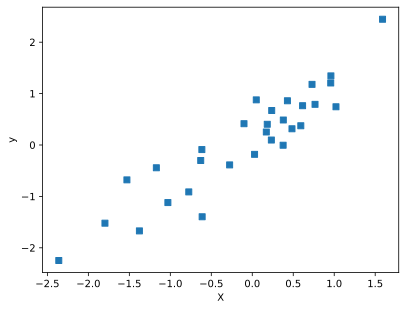

In [3]:
# Create data
N = 30
X = torch.randn(N, 1)
y = X + torch.randn(N, 1) / 2

# Visualize
plt.scatter(X, y, marker="s")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Build ANN Model

<br>

[![image.png](https://i.postimg.cc/NFkqbKP5/image.png)](https://postimg.cc/64qmppKX)

In [4]:
# Build model
ann_reg = nn.Sequential(
    nn.Linear(1, 1),  # input layer: 1 input and 1 output
    nn.ReLU(),  # Non-linear (activation) function
    nn.Linear(1, 1),  # output layer
)

ann_reg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [5]:
ann_reg.parameters()

<generator object Module.parameters at 0x7f7d4c962490>

In [6]:
# Set up optimizer
learning_rate = 0.05
loss_function = nn.MSELoss()

# Optimizer: A variant of gradient descent to be implemented
optimizer = torch.optim.SGD(params=ann_reg.parameters(), lr=learning_rate)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.05
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [7]:
# Train model
num_epochs = 500
# Instantiate losses
losses = torch.zeros(size=(num_epochs,))

In [8]:
for epoch_idx in range(num_epochs):
    # Forward prop
    y_pred = ann_reg(X)

    # Compute loss
    loss = loss_function(y_pred, y)
    losses[epoch_idx] = loss

    # Back prop
    optimizer.zero_grad()  # set the gradients to 0
    loss.backward()
    optimizer.step()

In [9]:
# Make predictions
predictions = ann_reg(X)

# Cost Function (Final loss using the entire data)
test_loss = (predictions - y).pow(2).mean()
test_loss

tensor(0.1547, grad_fn=<MeanBackward0>)

In [10]:
losses[:8]

tensor([1.4456, 1.1828, 0.9677, 0.7938, 0.6571, 0.5530, 0.4736, 0.4164],
       grad_fn=<SliceBackward0>)

In [11]:
# Extract only the tensor. (similar to converting it to numpy array)
losses.detach()[:3]

tensor([1.4456, 1.1828, 0.9677])

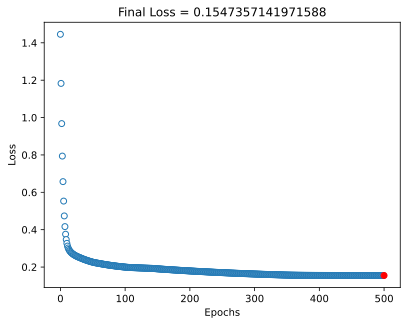

In [12]:
# Visualize
plt.plot(losses.detach(), "o", mfc="w", lw=0.1)
plt.plot(num_epochs, test_loss.detach(), "ro")
plt.title(f"Final Loss = {test_loss.item()}")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

#### Observation(s)

```
- The model trained for too long since the loss had plateaued and stopped decreasing.
- Training for about 200 to 300 might have been better.
```

In [13]:
y.shape, predictions.shape

# We want tot get a result with the shape of (1, 1).
# It means we have to transpose y so that (1, 30) x (30, 1) = (1, 1)

(torch.Size([30, 1]), torch.Size([30, 1]))

In [14]:
corr_value = np.corrcoef(y.T, predictions.detach().T)[0, 1]
corr_value

0.9199570033359401

### Observations

```
- The correlation between y and the predictions is not always a valid number. i.e it can be NaN.
- This happens when the model fails to make good predictions. i.e fails to learn the relationship between the input and the target variable.
- The performance of the model is poor.
```

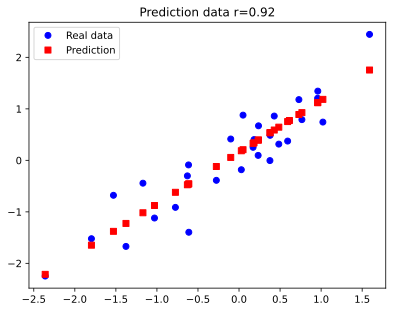

In [15]:
# Visualize the data
plt.plot(X, y, "bo", label="Real data")
plt.plot(X, predictions.detach(), "rs", label="Prediction")

# Display the correlation between the predicted values and the actual value.
plt.title(f"Prediction data r={corr_value:.2f}")

plt.legend()
plt.show()

## Workflow For Building and Training A Neural Network (PyTorch)

1. Build model.
2. Setup optimizer.
   1. Loss function.
   2. Learning rate.
3. Initialize parameters
   1. Losses
   2. Epochs
4. Train model.
   1. Forward prop.
   2. Compute losses per epoch.
   3. Back prop.
5. Make predictions.
6. Calculate cost function.
7.  Visualize the losses during training. (Optional)

<br>

```python
# Build model
model = nn.Sequential(
    # Input layer
    nn.Linear(1, 1),
    # Activation function
    nn.ReLU(),
    # Output layer (Linear function)
    nn.Linear(1, 1),
)

# Optimizer
learning_rate, loss_function = 0.01, nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Init params
epochs = 300
losses = torch.zeros(size=(epochs,))

# Train model
for epoch_idx in range(epochs):
    # Fwd prop
    _y_pred = model(X)

    # Compute loss
    loss = loss_function(_y_pred, y)
    losses[epoch_idx] = loss

    # Back prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Make Predictions
y_pred = model(X)

# Evaluation: MSE = mean((y_pred - y_true)^2)
validation_loss = (
    (y_pred.detach() - y).pow(2).mean()
)  # OR torch.mean(torch.square(y_pred.detach() - y))

```

### Multi-layer Network

```
- Deep neural network with many hidden layers and nodes.
```

In [16]:
# create data
n_clust = 100
blur = 1

A = [1, 3]
B = [1, -2]

# generate data
a = [A[0] + np.random.randn(n_clust) * blur, A[1] + np.random.randn(n_clust) * blur]
b = [B[0] + np.random.randn(n_clust) * blur, B[1] + np.random.randn(n_clust) * blur]

a[0].shape

(100,)

In [17]:
# True labels (NumPy)
# Stack zeros and ones vertically
labels_np = np.vstack((np.zeros((n_clust, 1)), np.ones((n_clust, 1))))
labels_np.shape

(200, 1)

In [18]:
# Concatenate into a matrix
data_np = np.hstack((a, b)).T
data_np.shape

(200, 2)

In [19]:
# Convert data to PyTorch Tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

In [20]:
# It returns the indices and the actual values
np.where(labels == 0)


# Select the indices that match the filter
# np.where(labels == 0)[0]

# Select the corresponding values
# np.where(labels == 0)[1]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

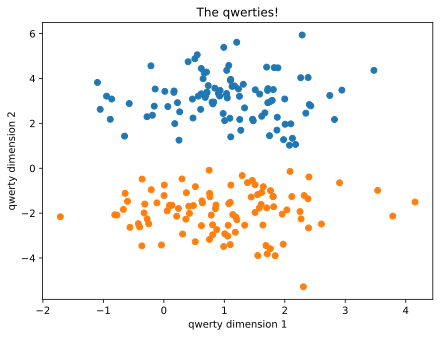

In [21]:
# Visualize data
plt.figure(figsize=(7, 5))

plt.scatter(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1])
plt.scatter(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1])

plt.title("The qwerties!")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")

plt.show()

In [22]:
def create_ANN_model(learning_rate: float) -> tuple[Any, Any, Any]:
    """This is used to build an ANN model with ONE hidden layer architecture.
    It returns the model, loss function and the optimizer."""

    # Model architecture
    model = nn.Sequential(
        nn.Linear(2, 16),  # input
        nn.ReLU(),  # activation function
        nn.Linear(16, 1),  # hidden layer
        nn.ReLU(),  # activation function
        nn.Linear(1, 1),  # output
        nn.Sigmoid(),  # final activation function
    )